# Loading data items CSV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('white')

In [3]:
fname = 'data_items.csv'
df = pd.read_csv(fname, header=1)

In [4]:
df = df.iloc[:195, :]
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [5]:
df.head()

,Title,Year,Authors,Journal/origin,Arxiv preprint?,Lab / School / Company,Nb of pages,Domain,domain1,domain2,...,Baseline model type,Statistical analysis of performance,Analysis of learned parameters,Discussion,Limitations/Obstacles,Code Available?,Limited Data,Others & Comments,Analyzed by,Reviewed by
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Waseda University,4.0,Transportation,Classification of EEG signals,Monitoring,...,None,NaN,No,"""This study does not impose in any way a direc...",NaN,No,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,Cleaning EEG Signals,Improvement of processing tools,Signal cleaning,...,Traditional pipeline,NaN,NaN,"""Compared with the classical OAs removal metho...",NaN,No,No,Poorly written... :( The way some elements are...,Yannick,Hubert
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,"Duke-NUS Medical School, Singapore\nUniversity...",11.0,Sleep,Classification of EEG signals,Clinical,...,None,NaN,No,"""... our framework provides a practicable, val...",N/M,No,No,"Great paper, with most of the information avai...",Yannick,Hubert
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,UBC,12.0,Epilepsy,Classification of EEG signals,Clinical,...,Traditional pipeline,NaN,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,"National Polytechnic Institute, Mexico",7.0,BCI,Classification of EEG signals,BCI,...,Traditional pipeline,NaN,Yes (visualization of learned parameters),The analysis of the DNN first layer weights re...,N/M,No,No,They say that it could go up to 220 commands!!...,Yannick,Hubert


## Sanity checks

/home/isabela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


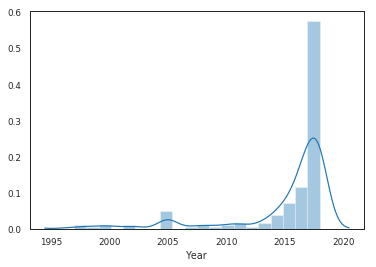

In [6]:
sns.distplot(df['Year'].dropna(axis=0))

/home/isabela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


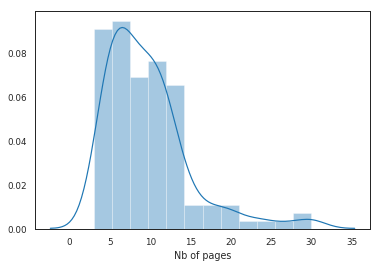

In [7]:
sns.distplot(df['Nb of pages'].dropna(axis=0))

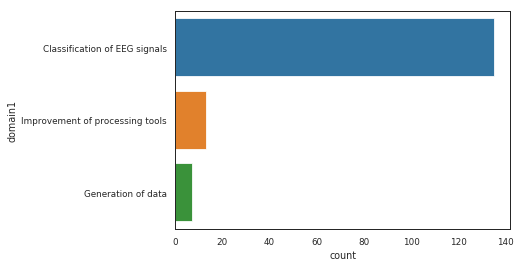

In [8]:
sns.countplot(y='domain1', data=df)

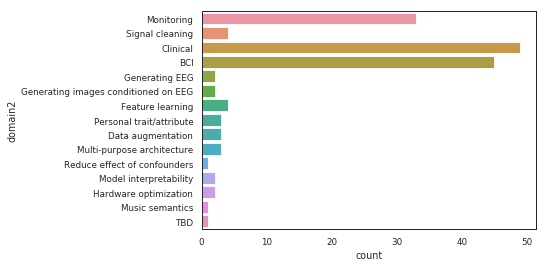

In [8]:
sns.countplot(y='domain2', data=df)

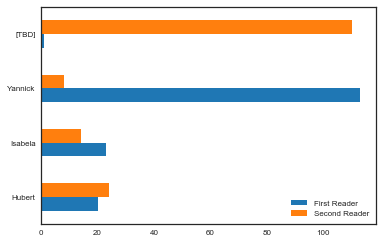

In [131]:
#df[['Analyzed by', 'Reviewed by']].apply(pd.value_counts).plot(kind='barh')
df[['First Reader', 'Second Reader']].apply(pd.value_counts).plot(kind='barh')

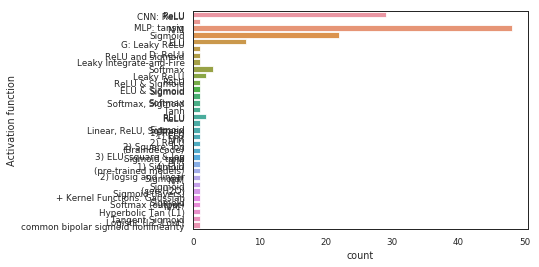

In [10]:
sns.countplot(y='Activation function', data=df)

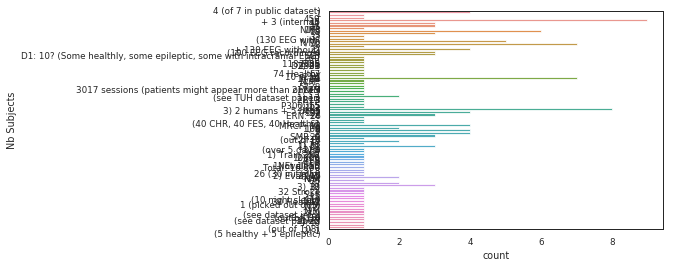

In [11]:
sns.countplot(y='Nb Subjects', data=df)

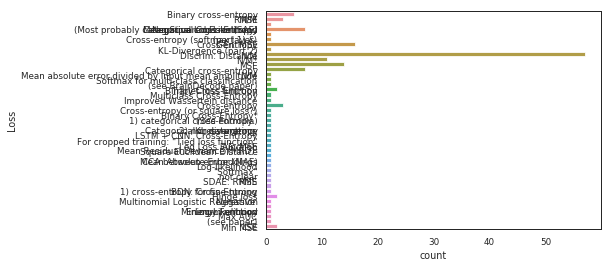

In [12]:
sns.countplot(y='Loss', data=df)

# Domains

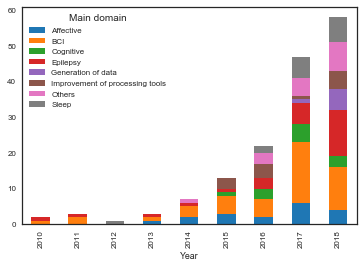

In [76]:
df['Year'] = df['Year'].astype('int32')
main_domains = ['Epilepsy', 'Sleep', 'BCI', 'Affective', 'Cognitive', 
                'Improvement of processing tools', 'Generation of data']
domains_df = df[['Domain 1', 'Domain 2', 'Domain 3', 'Domain 4']]
df['Main domain'] = [row[row.isin(main_domains)].values[0] 
                              if any(row.isin(main_domains)) else 'Others' for ind, row in domains_df.iterrows()]
df.groupby(['Year', 'Main domain']).size().unstack('Main domain').plot(kind='bar', stacked=True, title='')

plt.savefig("./figs/{}.eps".format("Domains per Years"), bbox_inches='tight', format='eps', dpi=1000)

## Yannick addons. (temp stuff)

#1 - Download:
https://docs.google.com/spreadsheet/ccc?key=1smpU0WSlSq-Al2u_QH3djGn68mTuHlth2fNJTrD3wa8&output=csv

#2 - Rename it to "papers.csv"

In [8]:
%matplotlib inline

fname = 'papers.csv'
df = pd.read_csv(fname, header=1)

In [9]:
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [11]:
print(str(len(df)) + " studies.")
df.head()

156 studies.


,Title,Year,Authors,Journal / Origin,Arxiv,Lab / School / Company,Pages,Domain 1,Domain 2,Domain 3,...,Analysis of learned parameters,Discussion,Limitations,Code available,Code hosted on,Limited data,Others & Comments,First Reader,Second Reader,Citation
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Waseda University,4.0,Classification of EEG signals,Monitoring,Cognitive,...,No,"""This study does not impose in any way a direc...",NaN,No,NaN,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela,Almogbel2018
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,Improvement of processing tools,Signal cleaning,Artifact handling,...,NaN,"""Compared with the classical OAs removal metho...",NaN,No,NaN,No,Poorly written... :( The way some elements are...,Yannick,Hubert,Yang2018
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,"Duke-NUS Medical School, Singapore\nUniversity...",11.0,Classification of EEG signals,Clinical,Sleep,...,No,"""... our framework provides a practicable, val...",N/M,No,NaN,No,"Great paper, with most of the information avai...",Yannick,Hubert,Patanaik2018
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,UBC,12.0,Classification of EEG signals,Clinical,Epilepsy,...,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,NaN,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert,Hussein2018
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,"National Polytechnic Institute, Mexico",7.0,Classification of EEG signals,BCI,Reactive,...,Yes (visualization of learned parameters),The analysis of the DNN first layer weights re...,N/M,No,NaN,No,They say that it could go up to 220 commands!!...,Yannick,Hubert,Perez-Benitez2018


In [11]:
# Inspired by: AKuederle
# https://github.com/AKuederle/Py-Tex-automation-example

import pandas as pd
import tex_utils

#papers = pd.read_csv('./paperx.csv')
#papers = pd.read_csv('./papers.csv', header=1)
papers = df

papers = papers.dropna(axis=1, how='all')

# ===============================================
# Need to run Main Domains Cell before this one!
# ===============================================
domains = set(papers['Main domain'].dropna(axis=0, how='all'))

nested_datasets = {}

for domain in domains:
    print('Domain:' + domain)

    sub_papers = papers[papers['Main domain'] == domain]
    sub_datasets = sub_papers['Dataset name'].dropna(axis=0, how='all')

    # 1 Paper might use multiple datasets
    l = [dsname.split(";\n") for dsname in sub_datasets]
    sub_datasets = set([item for sublist in l for item in sublist])

    # ========================================
    # Handle exception to make it "prettier".
    # Exception 1: Combining datasets.
    # - BCI Competition Datasets.
    # ========================================
    tex_utils.combine_datasets(sub_datasets, "BCI Competition")
    tex_utils.combine_datasets(sub_datasets, "TUH")

    # Step 3 - Create nested list of publications per dataset for this domain.
    nested_list = {k: list(sub_papers[sub_papers['Dataset name'].str.contains(k)]['Citation']) for k in sub_datasets}

    # ========================================
    # Handle exception to make it "prettier".
    # Exception 2: Datasets used only once.
    # ========================================
    toBeRemoved = []
    others = []
    for dataset in nested_list:
        if len(nested_list[dataset]) < 2:
            others.append(nested_list[dataset])
            toBeRemoved.append(dataset)

    for dataset in toBeRemoved:
        nested_list.pop(dataset)

    others = [val for sublist in others for val in sublist]
    if len(others) > 0:
        nested_list['Other Datasets'] = others

    #if 'Internal Recordings' in nested_list:
    #    nested_list = move_element(nested_list, "Internal Recordings", 1)
    #if 'Others' in nested_list:
    #    nested_list = move_element(nested_list, "Others", 2)

    # Step 4 - Save the final list of papers per dataset for this domain.
    nested_datasets[domain] = nested_list

print('LaTeX!')
template = tex_utils.get_template('./table_template.tex')
variable_dict = {'datasets': nested_datasets}
texstr = tex_utils.compile_pdf_from_template(template, variable_dict, './dataset_table.pdf')
print('Done!')

KeyError: 'Main domain'

## Data Accessibility

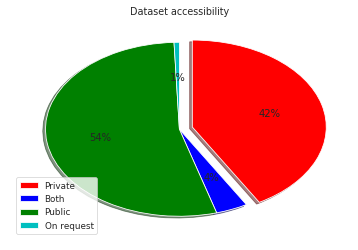

In [12]:
col_name = 'Dataset accessibility'
col_options = ['Private', 'Both', 'Public', 'On request']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]]]
colors = ['r', 'b', 'g', 'c']
explode = (0.1, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

## Code Accessibility

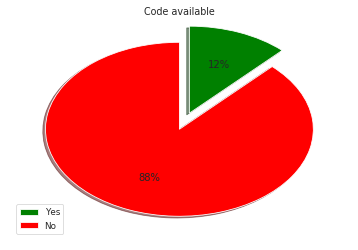

15             Kuanar2018
21     Schirrmeister2017a
35               Sors2018
38             Zhang2018a
46                 Wu2018
48         Schwabedal2018
56            Lawhern2018
71      Schirrmeister2017
73             Zhang2017g
75             Zhang2017d
77           Supratak2017
80             Zhang2017e
81             Zhang2017c
103        Loshchilov2017
104        Spampinato2017
128         Bashivan2016a
131            Stober2015
149                 [TBD]
156         Langkvist2012
Name: Citation, dtype: object


In [13]:
col_name = 'Code available'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.2, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

print(df[df['Code available'] == 'Yes']['Citation'])

## Code Sharing Platforms

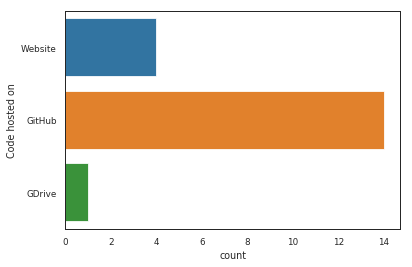

In [14]:
sns.countplot(y='Code hosted on', data=df[df['Code hosted on'] != 'N/A'])
plt.savefig("./figs/{}.eps".format('Code hosted on'), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()

## Limited Data Available

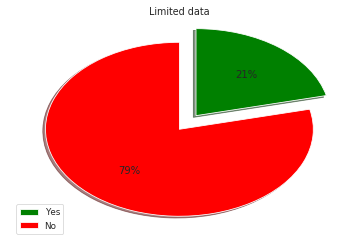

In [15]:
col_name = 'Limited data'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.2, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Datasets

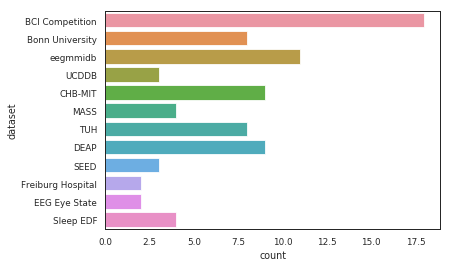

In [16]:
import collections

def remove_me(ds, item_name):
    ds2 = [y for y in ds if y != item_name]
    return ds2

datasets = df['Dataset name']
datasets_full = [dsname.split(";\n") for dsname in datasets]
datasets_ffull = [item for sublist in datasets_full for item in sublist]  

# Combining Datasets
combine_ds = ["BCI Competition", "TUH"]
for c in combine_ds:
    for n, i in enumerate(datasets_ffull):
        if c in i:
            datasets_ffull[n] = c

# Removing Datasets
a = remove_me(datasets_ffull,"Internal Recordings")
for ds in collections.Counter(a).items():
    if ds[1] < 2:
        #print("Removing (<2): " + ds[0])
        a = remove_me(a, ds[0])
        
ds_df = (pd.DataFrame.from_dict(collections.Counter(a), orient='index').reset_index()).rename(columns={'index':'dataset', 0:'count'})
#print(ds_df)

ax = sns.barplot(y='dataset', x='count', data=ds_df)

plt.savefig("./figs/{}.eps".format("Datasets"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Network Graph/Table/Schema

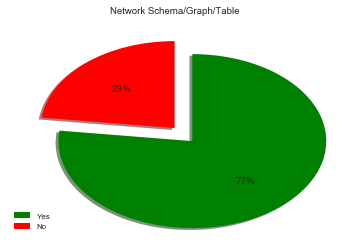

In [106]:
col_name = 'Network Schema/Graph/Table'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.2, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format("Network Schema"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Reproducibility - Easy/Medium/Hard/Impossible

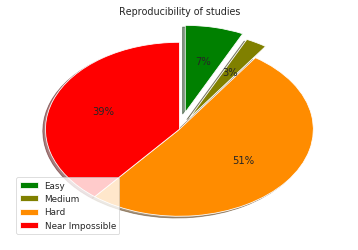

Easy:
21     Schirrmeister2017a
35               Sors2018
48         Schwabedal2018
73             Zhang2017g
75             Zhang2017d
77           Supratak2017
81             Zhang2017c
103        Loshchilov2017
104        Spampinato2017
131            Stober2015
156         Langkvist2012
Name: Citation, dtype: object
Medium:
38           Zhang2018a
56          Lawhern2018
71    Schirrmeister2017
80           Zhang2017e
Name: Citation, dtype: object


In [19]:
df_easy = df[(df['Code available'] == 'Yes') & (df['Dataset accessibility'] == 'Public')] # Shared Code + Data.
df_medium = df[(df['Code available'] == 'Yes') & (df['Dataset accessibility'] == 'Both')] # Shared Code + Private & Public Data.
df_impossible = df[(df['Code available'] == 'No') & (df['Dataset accessibility'] == 'Private')] # Nothing is shared.

a = len(df_easy)
b = len(df_medium)
c = len(df_impossible)
d = len(df) - a - b - c

col_name = 'Reproducibility of studies'
col_options = ['Easy', 'Medium', 'Hard', 'Near Impossible']    # To control the order and plot color/explode.
values = [a,b,d,c]
colors = ['g', 'olive', 'darkorange', 'r']
explode = (0.2, 0.15, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format("Reproducibility of studies"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

print('Easy:')
print(df_easy['Citation'])
print('Medium:')
print(df_medium['Citation'])

# Architectures

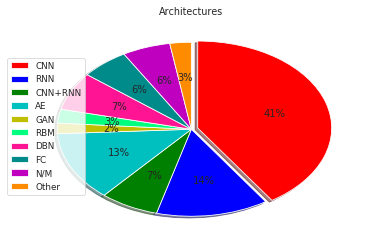

In [12]:
col_name = 'Architecture (clean)'
col_options = ['CNN', 'RNN', 'CNN+RNN', 'AE', 'GAN', 'RBM', 'DBN', 'FC', 'N/M', 'Other']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]], df[col_name].value_counts()[col_options[4]], df[col_name].value_counts()[col_options[5]], df[col_name].value_counts()[col_options[6]], df[col_name].value_counts()[col_options[7]], df[col_name].value_counts()[col_options[8]], df[col_name].value_counts()[col_options[9]]]
colors = ['r', 'b', 'g', 'c', 'y', 'springgreen', 'deeppink', 'darkcyan', 'm', 'darkorange']
explode = (0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Architectures')
plt.legend(col_options, loc=(-0.05, 0.2))
save_str = 'architec_dist'
plt.savefig("./figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Features

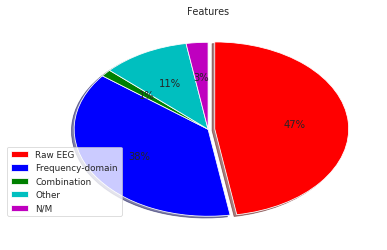

In [13]:
col_name = 'Features (clean)'
col_options = ['Raw EEG', 'Frequency-domain', 'Combination', 'Other',  'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]], df[col_name].value_counts()[col_options[4]]]
colors = ['r', 'b', 'g', 'c', 'm']
explode = (0.05, 0, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Features')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'feat_distribution'
plt.savefig("./figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Number of layers

In [67]:
col_name = 'Layers (clean)'
df_layers_rep = df[(df[col_name] != 'N/M')] # Papers that reported #layers
df_layers_not_rep = df[(df['Layers (clean)'] == 'N/M')]
print(len(df_layers_not_rep))
range_ = [0, 3, 10, 15, 20, 100]
values = pd.to_numeric(df_layers_rep[col_name]).value_counts(bins=range_)
print(values)

17
(3.0, 10.0]      69
(-0.001, 3.0]    58
(10.0, 15.0]      8
(20.0, 100.0]     2
(15.0, 20.0]      2
Name: Layers (clean), dtype: int64


# Architectures per years

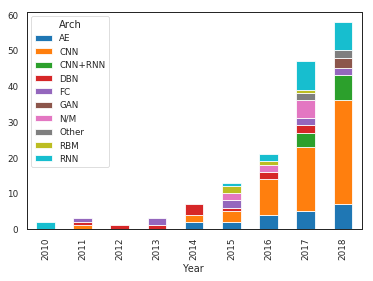

In [22]:
df['Year'] = df['Year'].astype('int32')
col_name = 'Architecture (clean)'
df['Arch'] = df[col_name]
df.groupby(['Year', 'Arch']).size().unstack('Arch').plot(kind='bar', stacked=True, title='')

plt.savefig("./figs/{}.eps".format("archictures_years"), bbox_inches='tight', format='eps', dpi=1000)

# Architectures vs Input type

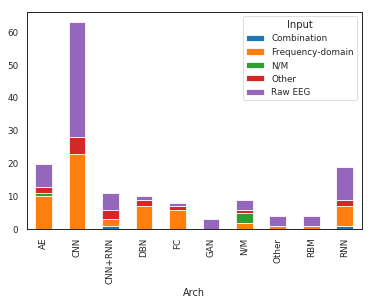

In [15]:
df['Input'] = df['Features (clean)']
col_name = 'Architecture (clean)'
df['Arch'] = df[col_name]
df.groupby(['Input', 'Arch']).size().unstack('Input').plot(kind='bar', stacked=True, title='')

plt.savefig("./figs/{}.eps".format("Arch vs Input"), bbox_inches='tight', format='eps', dpi=1000)

# Training procedure

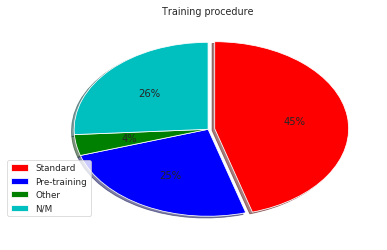

In [17]:
col_name = 'Training procedure (clean)'
col_options = ['Standard', 'Pre-training', 'Other',  'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]]]
colors = ['r', 'b', 'g', 'c']
explode = (0.05, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Training procedure')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'training'
plt.savefig("./figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Regularization

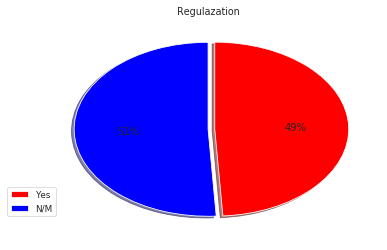

In [19]:
col_name = 'Regularization clean'
col_options = ['Yes',  'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['r', 'b']
explode = (0.05, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Regulazation')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'regularization'
plt.savefig("./figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Optimizer

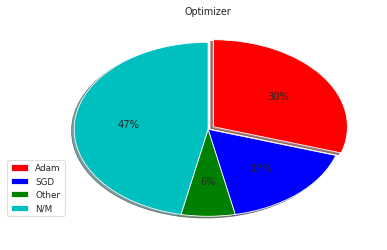

In [21]:
col_name = 'Optimizer (Clean)'
col_options = ['Adam', 'SGD', 'Other',  'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]]]
colors = ['r', 'b', 'g', 'c']
explode = (0.05, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Optimizer')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'optimizer'
plt.savefig("./figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Optimizer per years

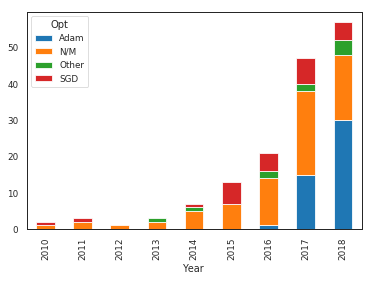

In [24]:
df['Year'] = df['Year'].astype('int32')
col_name = 'Optimizer (Clean)'
df['Opt'] = df[col_name]
df.groupby(['Year', 'Opt']).size().unstack('Opt').plot(kind='bar', stacked=True, title='')

plt.savefig("./figs/{}.eps".format("optimizer_years"), bbox_inches='tight', format='eps', dpi=1000)

# Pre-processing

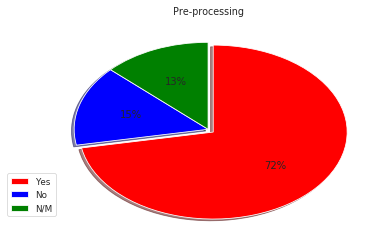

In [25]:
col_name = 'Preprocessing (clean)'
col_options = ['Yes', 'No', 'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]]]
colors = ['r', 'b', 'g']
explode = (0.05, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Pre-processing')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'preprocessing'
plt.savefig("./figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Artefact handling

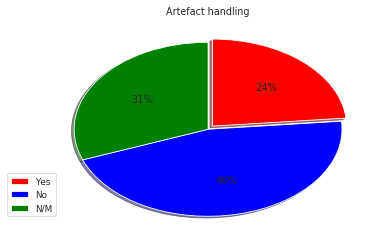

In [27]:
col_name = 'Artefact handling (clean)'
col_options = ['Yes', 'No', 'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]]]
colors = ['r', 'b', 'g']
explode = (0.05, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Artefact handling')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'artefact_handling'
plt.savefig("./figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()